In [1]:
#Importing top 500 movies dataset

import pandas as pd

dataset_path = "IMDBTop500.csv"
df = pd.read_csv(dataset_path)

print(df.head())

       movie_id  rank    votes                   title  \
0  0  tt7286456     1  1270536                   Joker   
1  1  tt4154796     2  1121033       Avengers: Endgame   
2  2  tt4154756     3  1072978  Avengers: Infinity War   
3  3  tt6751668     4   794032                Parasite   
4  4  tt1825683     5   766487           Black Panther   

            originalTitle  year  rating titleType  isAdult  runtime  \
0                   Joker  2019     8.4     movie        0      122   
1       Avengers: Endgame  2019     8.4     movie        0      181   
2  Avengers: Infinity War  2018     8.4     movie        0      149   
3            Gisaengchung  2019     8.5     movie        0      132   
4           Black Panther  2018     7.3     movie        0      134   

                                  genres  
0     Crime, Drama, Thriller              
1   Action, Adventure, Drama              
2  Action, Adventure, Sci-Fi              
3            Drama, Thriller              
4  Action

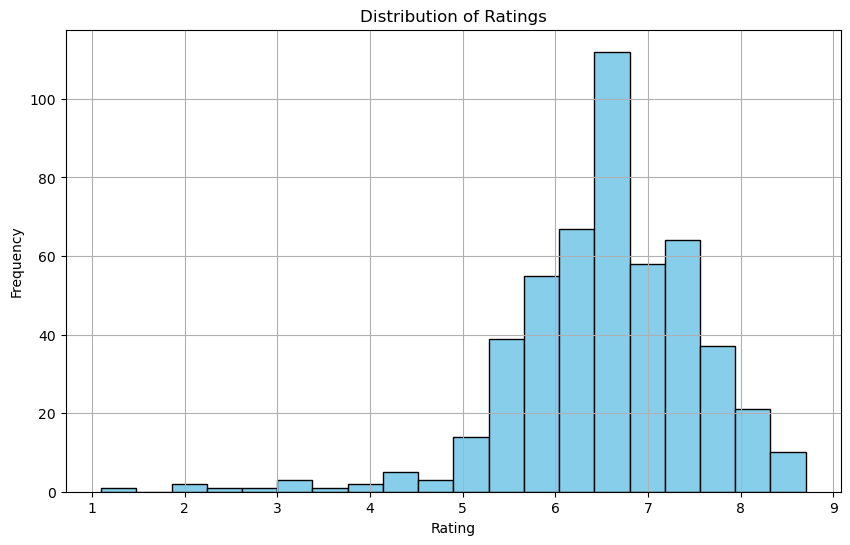

In [24]:
# Visualizing distribution of ratings shows us that the majority of movies in the dataset are rated between 6 and 7 out of 10.

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df['rating'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

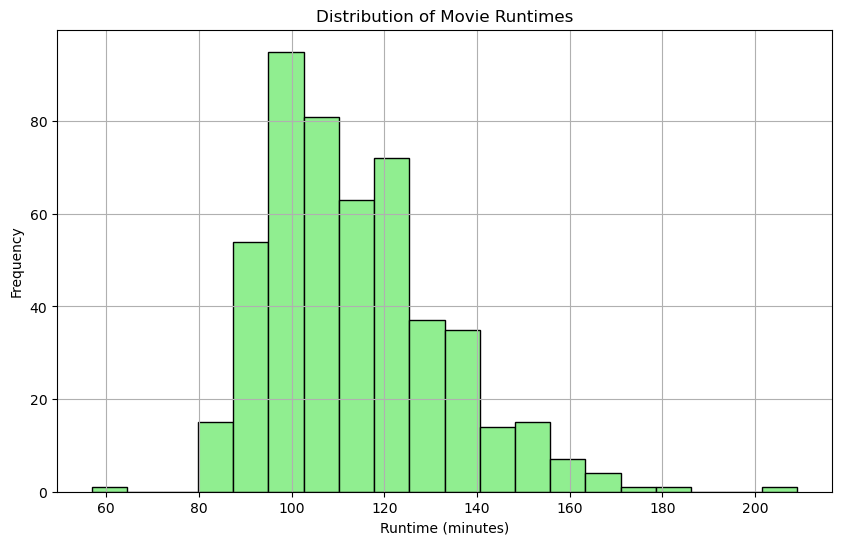

In [4]:
# Analysing movie runtimes indicates that movies with runtimes ~100 minutes are most frequently represented in the dataset.

plt.figure(figsize=(10,6))
df['runtime'].plot(kind='hist', bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Movie Runtimes')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

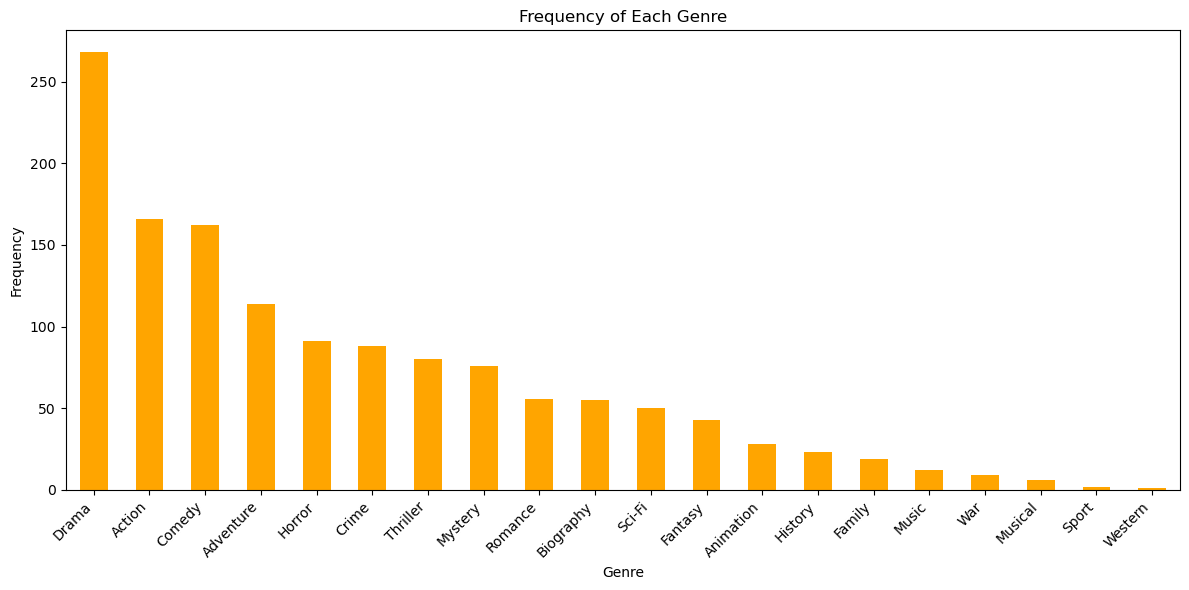

In [18]:
# Splitting the genres column to separate multiple values into individual rows
genre_df = df['genres'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).rename('Genre')
genre_df = df.drop('genres', axis=1).join(genre_df)

# Removing leading and trailing whitespaces from the 'Genre' column
genre_df['Genre'] = genre_df['Genre'].str.strip()

# Visualizing frequency of each genre indicates that 'Drama' movies are most frequently represented in the dataset.
genre_counts = genre_df['Genre'].value_counts()

plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar', color='orange')
plt.title('Frequency of Each Genre')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()




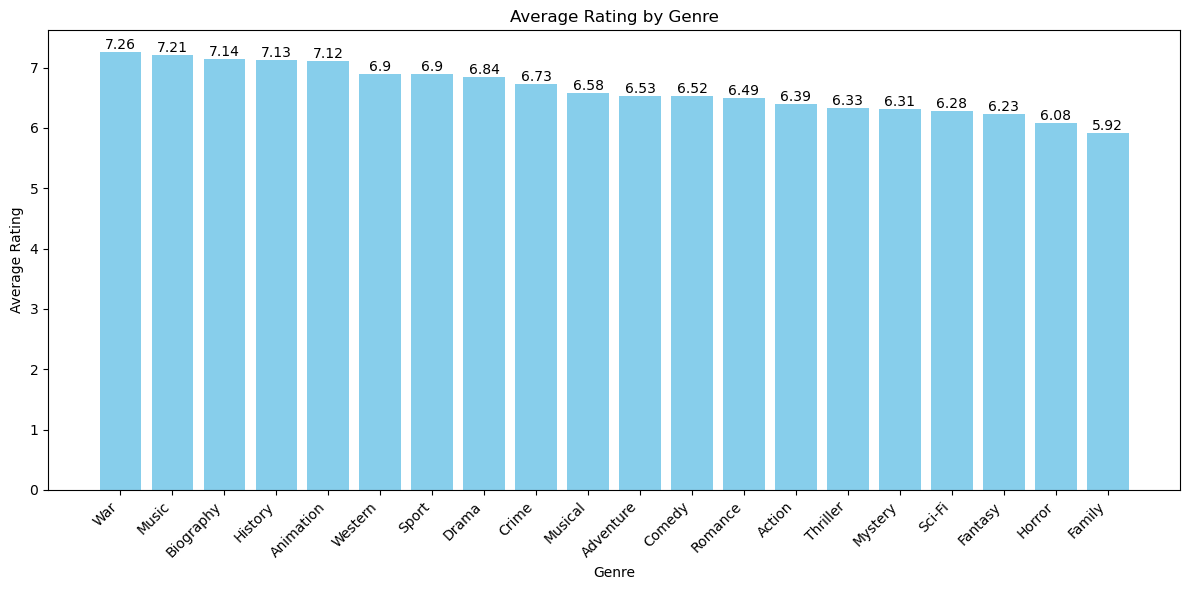

In [14]:
# Grouping the dataframe by 'Genre' and calculating the mean rating for each genre
genre_ratings = genre_df.groupby('Genre')['rating'].mean().sort_values(ascending=False)

# Plotting the average rating associated with each genre
plt.figure(figsize=(12, 6))
bars = plt.bar(genre_ratings.index, genre_ratings, color='skyblue')

# Adding labels to each bar shows us that 'War' movies have the highest average ratings at 7.26, and 'Family' movies have the lowest average rating at 5.92
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.title('Average Rating by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



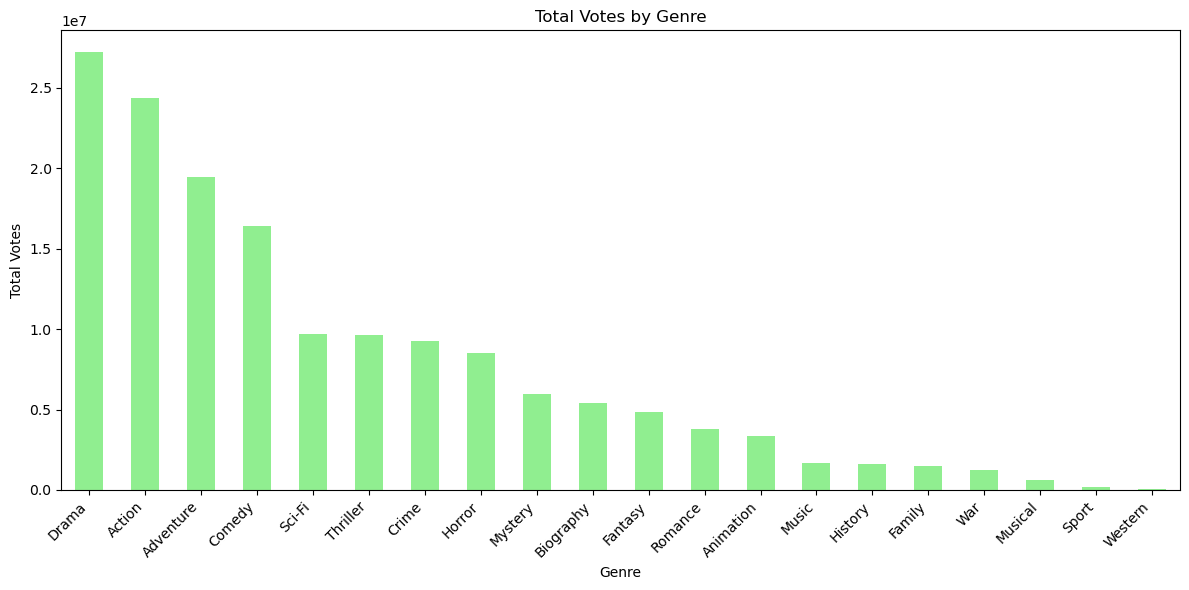

In [19]:

# Grouping the dataframe by 'Genre' and calculating the sum of the 'Number of Votes' column for each genre
genre_total_votes = genre_df.groupby('Genre')['votes'].sum().sort_values(ascending=False)

# Plotting the total votes associated with each genre indicates that 'Drama' movies recieved the most total votes from users, while 'Western' movies recieved the least.
plt.figure(figsize=(12, 6))
genre_total_votes.plot(kind='bar', color='lightgreen')
plt.title('Total Votes by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Votes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
